<a href="https://colab.research.google.com/github/sinaabbasi1/applied-data-science/blob/main/Assignments/Assignment%2003/ADS_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About the Dataset

A dataset of all daily hit charts curated by Spotify.

###Content
This is a complete dataset of all the "Top 200" and "Viral 50" charts published globally by Spotify. Spotify publishes a new chart every 2-3 days. This is its entire collection since January 1, 2017 until end of 2021.

###Note
The value of streams is NULL when the chart column is "viral50".

# Loading the Dataset

Since the size of our dataset is rather large this time, we are going to import it directly from Kaggle.

Basically, what we need is to:


*   Create a token on Kaggle
*   Install the Kaggle libray here in Colab
*   Upload the token (kaggle.json) file here
*   Import the dataset we have in mind



In [ ]:
# First, let's import the libraries we'll need later
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter
import os

In [ ]:
# Install Kaggle
# !pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle
!kaggle -v

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Also, let's upgrade plotly, we'll need it later
!pip install plotly --upgrade
!pip install jupyter-dash

Now let's copy the token in the correct place and then set the correct permissions:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

Next, we just need to download the dataset from Kaggle:

In [ ]:
! kaggle datasets download -d dhruvildave/spotify-charts

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 19, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/__init__.py", line 22, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 84, in <module>
    class KaggleApi(KaggleApi):
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 102, in KaggleApi
    os.makedirs(config_dir)
  File "/usr/lib/python3.7/os.py", line 213, in makedirs
    makedirs(head, exist_ok=exist_ok)
  File "/usr/lib/python3.7/os.py", line 223, in makedirs
    mkdir(name, mode)
OSError: [Errno 107] Transport endpoint is not connected: '/content/gdrive/My Drive'


Finally, we need to unzip the dataset and we'll be all set:

In [ ]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


#EDA

Now let's import the CSV file into a dataframes. This might take a few seconds given the size of dataset.

In [ ]:
df = pd.read_csv('charts.csv', parse_dates=[2])

Some EDA stuff coming up!!

In [ ]:
df.shape

(26173514, 9)

In [ ]:
df.describe()

,rank,streams
count,2.617351e+07,2.032190e+07
mean,8.092314e+01,5.526131e+04
std,5.918601e+01,2.095872e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,3.546000e+03
50%,6.700000e+01,9.565000e+03
75%,1.310000e+02,3.540900e+04
max,2.000000e+02,1.974970e+07


In [ ]:
df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    object        
 1   rank     int64         
 2   date     datetime64[ns]
 3   artist   object        
 4   url      object        
 5   region   object        
 6   chart    object        
 7   trend    object        
 8   streams  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.8+ GB


As mentioned before lots of null entries in the *streams* column is becuase of "viral50" chart column.

In [ ]:
df.isna().sum()

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

### Value Counts

As we can see "Shape of you" was the most occured title in the top hits of spotify.

In [ ]:
df['title'].value_counts()

Shape of You                  68965
Believer                      60172
Someone You Loved             57595
Dance Monkey                  56850
Blinding Lights               56058
                              ...  
VIVID                             1
Manda Nudes Intro                 1
Deal With It (feat. Kelis)        1
The walker                        1
Lämna Han (remix)                 1
Name: title, Length: 164806, dtype: int64

We have rankings between 1 to 50 more than as twice as another rankings and that's because of "viral50" chart doesn't have those rankings.

In [ ]:
df['rank'].value_counts()[40:60]

41    226109
42    226063
43    226032
44    225991
45    225965
46    225941
47    225928
48    225869
49    225846
50    225780
51    109172
52    108727
53    108545
54    108377
55    108194
56    108034
57    107868
58    107699
59    107529
60    107395
Name: rank, dtype: int64

Some slightly problem with 2nd and 3rd rankings, but as we can see it's not a big deal.

In [ ]:
df['rank'].value_counts().head()

1    227253
5    227203
6    227201
4    227199
7    227190
Name: rank, dtype: int64

In [ ]:
df[df['rank'] == 2]['rank'].count()

227177

In [ ]:
df[df['rank'] == 3]['rank'].count()

227187

"Ed Sheeran" is the most occured value between all of the artists.

In [ ]:
df['artist'].value_counts()

Ed Sheeran                                                                 387917
Billie Eilish                                                              251825
Post Malone                                                                211272
Bad Bunny                                                                  203403
Ariana Grande                                                              189914
                                                                            ...  
Ezhel, Patron, Anıl Piyancı, Sansar Salvo, Allame, Pit10, Beta, Kamufle         1
Lips, George Mason, Rose McIver, Kimbra                                         1
Joakim Kleven, KOH                                                              1
Lazyloxy, Maiyarap, OG-ANIC, UrboyTJ                                            1
Luna 99                                                                         1
Name: artist, Length: 96156, dtype: int64

Number of each one of chart types:

In [ ]:
df['chart'].value_counts()

top200     20321904
viral50     5851610
Name: chart, dtype: int64

We have Argentina "top200" more than any other country.

In [ ]:
df['region'].value_counts()

Argentina        455308
United States    455057
Austria          454593
Brazil           454439
Australia        453103
                  ...  
Ukraine          127544
Russia           126837
Luxembourg        98053
Andorra           79592
South Korea       76276
Name: region, Length: 70, dtype: int64

Largest number of streams in a single record of dataframe belongs to Easy On Me by Adele:

In [ ]:
df.max()['streams']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


19749704.0

In [ ]:
df[df['streams'] == df.max()['streams']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,title,rank,date,artist,url,region,chart,trend,streams
22999369,Easy On Me,1,2021-10-15,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Global,top200,MOVE_UP,19749704.0


And this is top 10 records of dataframe with most streams:

In [ ]:
df.sort_values('streams', ascending = False).head(10)

,title,rank,date,artist,url,region,chart,trend,streams
22999369,Easy On Me,1,2021-10-15,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Global,top200,MOVE_UP,19749704.0
17849245,All I Want for Christmas Is You,1,2020-12-24,Mariah Carey,https://open.spotify.com/track/0bYg9bo50gSsH3L...,Global,top200,SAME_POSITION,17223237.0
17849246,Last Christmas,2,2020-12-24,Wham!,https://open.spotify.com/track/2FRnf9qhLbvw8fu...,Global,top200,SAME_POSITION,15813799.0
16687378,drivers license,1,2021-01-15,Olivia Rodrigo,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,Global,top200,SAME_POSITION,13714177.0
16564161,drivers license,1,2021-01-14,Olivia Rodrigo,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,Global,top200,SAME_POSITION,13701177.0
16469259,drivers license,1,2021-01-13,Olivia Rodrigo,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,Global,top200,SAME_POSITION,13628143.0
17931746,All I Want for Christmas Is You,1,2020-12-25,Mariah Carey,https://open.spotify.com/track/0bYg9bo50gSsH3L...,Global,top200,SAME_POSITION,13573228.0
16329756,drivers license,1,2021-01-12,Olivia Rodrigo,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,Global,top200,SAME_POSITION,13412192.0
23069513,Easy On Me,1,2021-10-16,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Global,top200,SAME_POSITION,13271124.0
20265983,good 4 u,1,2021-05-25,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,Global,top200,SAME_POSITION,12586645.0


Did you knew 'Nan' is a float?
Interesting!!

In [ ]:
a = float('NaN')

In [ ]:
type(a)

float

In [ ]:
a

nan

In [ ]:
df[(df['title'] == 'Easy On Me') & (df['trend'] == 'MOVE_UP')].head()

,title,rank,date,artist,url,region,chart,trend,streams
21500402,Easy On Me,50,2021-11-01,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Argentina,top200,MOVE_UP,71132.0
21500757,Easy On Me,3,2021-11-01,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Austria,top200,MOVE_UP,25604.0
21504689,Easy On Me,60,2021-11-01,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Bolivia,top200,MOVE_UP,4173.0
21505361,Easy On Me,59,2021-11-01,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Brazil,top200,MOVE_UP,225043.0
21505510,Easy On Me,7,2021-11-01,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Bulgaria,top200,MOVE_UP,3349.0


In [ ]:
df[(df['title'] == 'Easy On Me') & (df['trend'] == 'MOVE_UP')].head().groupby(['title']).sum()

,rank,streams
title,,
Easy On Me,179,329301.0


Songs with most streams during 2017 to 2021:

In [ ]:
df.groupby(['title', 'artist']).sum().sort_values('streams', ascending=False).head().loc[:, ['streams']]

,,streams
title,artist,
Shape of You,Ed Sheeran,5.245740e+09
Blinding Lights,The Weeknd,5.183476e+09
Dance Monkey,Tones And I,4.549611e+09
Someone You Loved,Lewis Capaldi,4.000278e+09
Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",3.786211e+09


Artists with most streams during 2017 to 2021:

In [ ]:
df.groupby(['artist']).sum().sort_values('streams', ascending=False).head(5).loc[:, ['streams']]

,streams
artist,
Ed Sheeran,2.359566e+10
Post Malone,1.945275e+10
Drake,1.818064e+10
Billie Eilish,1.719380e+10
Ariana Grande,1.537585e+10


Regions with most stream during 2017 to 2021:

In [ ]:
df.groupby(['region']).sum().sort_values('streams', ascending=False).head(5).loc[:, ['streams']]

,streams
region,
Global,4.393043e+11
United States,1.421321e+11
Brazil,5.586668e+10
Mexico,4.559591e+10
Germany,3.995627e+10


Dates with most streams during 2017 to 2021:

As you can see 12-24 and 12-25 of every year are dates with most streams through the year.

In [ ]:
df.groupby(['date']).sum().sort_values('streams', ascending=False).head(10).loc[:, ['streams']]

,streams
date,
2020-12-24,1.372631e+09
2020-12-25,1.233554e+09
2021-09-03,1.095421e+09
2019-12-24,1.087630e+09
2019-12-25,9.509762e+08
2021-09-04,9.500533e+08
2018-12-24,9.433880e+08
2020-12-11,9.427412e+08
2021-11-12,9.422624e+08


#Bokeh

In this section we are going to use *Bokeh* and then some interactive plots using it.

First let's install bokeh and import necessary libraries.

In [ ]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, reset_output, show

This is customized show function when I ran to a bug for `show` function from `bokeh.io` in Colab.

In [ ]:
def bshow(p):
  try:
    reset_output()
    output_notebook()
    show(p)
  except:
    output_notebook()
    show(p)

In [ ]:
df['title'].value_counts()

Shape of You                  68965
Believer                      60172
Someone You Loved             57595
Dance Monkey                  56850
Blinding Lights               56058
                              ...  
VIVID                             1
Manda Nudes Intro                 1
Deal With It (feat. Kelis)        1
The walker                        1
Lämna Han (remix)                 1
Name: title, Length: 164806, dtype: int64

In [ ]:
a = df[df['title'] == 'Shape of You'].head(10)
a

,title,rank,date,artist,url,region,chart,trend,streams
11324,Shape of You,58,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,MOVE_UP,43707.0
11507,Shape of You,40,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Australia,top200,MOVE_UP,81955.0
11727,Shape of You,60,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Austria,top200,SAME_POSITION,5188.0
11899,Shape of You,32,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Belgium,top200,MOVE_UP,11965.0
12113,Shape of You,46,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Bolivia,top200,MOVE_UP,2856.0
12268,Shape of You,53,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Brazil,top200,MOVE_UP,140385.0
12474,Shape of You,58,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Canada,top200,MOVE_UP,53968.0
12666,Shape of You,49,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Chile,top200,SAME_POSITION,51192.0
12857,Shape of You,38,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Colombia,top200,MOVE_UP,22796.0
13054,Shape of You,34,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Costa Rica,top200,SAME_POSITION,9364.0


In [ ]:
regions_with_most_stream_during_2017 = df.groupby(['region']).sum().sort_values('streams', ascending=False).head(5).loc[:, ['streams']]

In [ ]:
p = figure(x_range=list(a.index), height=400, title="Regions with most stream during 2017 to 2021:")

p.vbar(x=a.index, top=a['streams'], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
bshow(p)

In [ ]:
list(a.index[0:4])

In [ ]:
p = figure(plot_width=400, plot_height=400)
p.circle(list(a.index), [6, 7, 2, 4, 10], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

#Plotly

In this section we are going to use *Bokeh* and then some interactive plots using it.

In [ ]:
import plotly.express as px

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [ ]:
df.head()

,title,rank,date,artist,url,region,chart,trend,streams,year,month
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,2017,1
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0,2017,1
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,2017,1
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0,2017,1
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0,2017,1


All time stream by each song:

In [ ]:
df1 = df.groupby(['title', 'artist', 'year']).sum().sort_values('streams', ascending=False).loc[:, ['streams']]
df1

streams
title                         artist         year              
Blinding Lights               The Weeknd     2020  3.280757e+09
Shape of You                  Ed Sheeran     2017  2.964868e+09
Dance Monkey                  Tones And I    2020  2.367358e+09
STAY (with Justin Bieber)     The Kid LAROI  2021  2.257700e+09
drivers license               Olivia Rodrigo 2021  2.257579e+09
...                                                         ...
She's Gone                    STEELHEART     2017  0.000000e+00
                              L.A.B.         2017  0.000000e+00
                              Bartu Gülhan   2019  0.000000e+00
She's Gettin' Married         Yu Sakai       2020  0.000000e+00
Tempo (feat. Salvador Sobral) Tiago Nacarato 2018  0.000000e+00

[241360 rows x 1 columns]

In [ ]:
df.groupby(['title', 'artist']).sum().sort_values('streams', ascending=False).loc[:, ['streams']]

,,streams
title,artist,
Shape of You,Ed Sheeran,5.245740e+09
Blinding Lights,The Weeknd,5.183476e+09
Dance Monkey,Tones And I,4.549611e+09
Someone You Loved,Lewis Capaldi,4.000278e+09
Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",3.786211e+09
...,...,...
DAYBREAK'S BELL,L'Arc-en-Ciel,0.000000e+00
OG,"Titai, Tayc",0.000000e+00
DAYS,FLOW,0.000000e+00


Total number of occurences for each song:

In [ ]:
df2 = df.groupby(['title', 'artist','year']).size().sort_values(ascending=False).to_frame('total occur')
df2

,,,total occur
title,artist,year,
Blinding Lights,The Weeknd,2020,31304
Roses - Imanbek Remix,SAINt JHN,2020,27191
Dance Monkey,Tones And I,2020,25731
death bed (coffee for your head),"Powfu, beabadoobee",2020,25661
Don't Start Now,Dua Lipa,2020,23839
...,...,...,...
Dance For The Hell Of It,LOVA,2021,1
Without You,SEVENTEEN,2017,1
Dance Design,Tuur Deconinck,2021,1


number of times each song appeared in each chart:

In [ ]:
df.groupby(['title', 'artist', 'chart', 'year']).count().sort_values('streams', ascending=False).loc['Shape of You']

In [ ]:
temp_df_top200 = df[df['chart'] == 'top200']
temp_df_top200.shape

(20321904, 11)

In [ ]:
temp_df_viral50 = df[df['chart'] == 'viral50']
temp_df_viral50.shape

(5851610, 11)

In [ ]:
df3 = temp_df_top200.groupby(['title', 'artist', 'year']).size().sort_values(ascending=False).to_frame('total occur top200')
df3

,,,total occur top200
title,artist,year,
Blinding Lights,The Weeknd,2020,23980
Dance Monkey,Tones And I,2020,22814
Blinding Lights,The Weeknd,2021,21883
Levitating (feat. DaBaby),Dua Lipa,2021,21657
Don't Start Now,Dua Lipa,2020,21397
...,...,...,...
Wunden,"KEZ, Sierra Kidd",2020,1
Wunde (feat. Lo & Leduc),Dodo,2017,1
Wu Xu Yao Tai Duo,Leslie Cheung,2018,1


In [ ]:
df4 = temp_df_viral50.groupby(['title', 'artist', 'year']).size().sort_values(ascending=False).to_frame('total occur viral50')
df4

,,,total occur viral50
title,artist,year,
Dance Monkey,Tones And I,2019,9889
Astronaut In The Ocean,Masked Wolf,2021,8131
death bed (coffee for your head),"Powfu, beabadoobee",2020,7958
ily (i love you baby) (feat. Emilee),Surf Mesa,2020,7622
Roses - Imanbek Remix,SAINt JHN,2020,7395
Blinding Lights,The Weeknd,2020,7324
In My Mind,"Dynoro, Gigi D'Agostino",2018,6226


Joining:

In [ ]:
scatter_df = df1.merge(df2, on=['title', 'artist', 'year'], how='inner').merge(df3, on=['title', 'artist', 'year'], how='inner').merge(df4, on=['title', 'artist', 'year'], how='inner').reset_index()
scatter_df

,title,artist,year,streams,total occur,total occur top200,total occur viral50
0,Blinding Lights,The Weeknd,2020,3.280757e+09,31304,23980,7324
1,Shape of You,Ed Sheeran,2017,2.964868e+09,22914,19449,3465
2,Dance Monkey,Tones And I,2020,2.367358e+09,25731,22814,2917
3,STAY (with Justin Bieber),The Kid LAROI,2021,2.257700e+09,14235,10080,4155
4,drivers license,Olivia Rodrigo,2021,2.257579e+09,22791,19579,3212
...,...,...,...,...,...,...,...
51204,ใครอีกคน,BOWKYLION,2017,1.002000e+03,4,1,3
51205,Brand New Guy (feat. ScHoolboy Q),A$AP Rocky,2021,1.002000e+03,7,1,6
51206,Hlavarozbitajakslovensko,"Radikal Chef, Viet",2017,1.002000e+03,12,1,11
51207,Heaven,D-mol,2019,1.001000e+03,36,1,35


In [ ]:
# fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
# fig.show()
# df = px.data.iris()

fig = px.scatter(scatter_df, x='year', y='streams', color='total occur')
fig.show()

In [ ]:
df[(df['title'] == 'Shape of You') & (df['chart'] == 'top200')]

,title,rank,date,artist,url,region,chart,trend,streams
11324,Shape of You,58,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Argentina,top200,MOVE_UP,43707.0
11507,Shape of You,40,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Australia,top200,MOVE_UP,81955.0
11727,Shape of You,60,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Austria,top200,SAME_POSITION,5188.0
11899,Shape of You,32,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Belgium,top200,MOVE_UP,11965.0
12113,Shape of You,46,2018-03-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Bolivia,top200,MOVE_UP,2856.0
...,...,...,...,...,...,...,...,...,...
25275102,Shape of You,31,2018-01-31,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Thailand,top200,MOVE_DOWN,5179.0
25275291,Shape of You,20,2018-01-31,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Turkey,top200,MOVE_DOWN,27466.0
25275514,Shape of You,43,2018-01-31,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,United Kingdom,top200,SAME_POSITION,130711.0
25275755,Shape of You,83,2018-01-31,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,United States,top200,MOVE_DOWN,348564.0


In [ ]:
a = df.sort_values('streams', ascending=False)
# a = df.groupby(['title', 'artist']).sort_values('streams', ascending=False).loc[:, ['streams']].reset_index()
a['streams'] = 1
a

,title,rank,date,artist,url,region,chart,trend,streams
22999369,Easy On Me,1,2021-10-15,Adele,https://open.spotify.com/track/0gplL1WMoJ6iYaP...,Global,top200,MOVE_UP,19749704.0
17849245,All I Want for Christmas Is You,1,2020-12-24,Mariah Carey,https://open.spotify.com/track/0bYg9bo50gSsH3L...,Global,top200,SAME_POSITION,17223237.0
17849246,Last Christmas,2,2020-12-24,Wham!,https://open.spotify.com/track/2FRnf9qhLbvw8fu...,Global,top200,SAME_POSITION,15813799.0
16687378,drivers license,1,2021-01-15,Olivia Rodrigo,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,Global,top200,SAME_POSITION,13714177.0
16564161,drivers license,1,2021-01-14,Olivia Rodrigo,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,Global,top200,SAME_POSITION,13701177.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [ ]:
df = pd.read_csv('charts.csv')

In [ ]:
df.shape

(26173514, 9)

In [ ]:
df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [ ]:
def visualize_word_counts(counts):
    wc = WordCloud(max_font_size=130, min_font_size=25, colormap='tab20', background_color='white',
                   prefer_horizontal=.95, width=2100, height=700, random_state=0)
    cloud = wc.generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

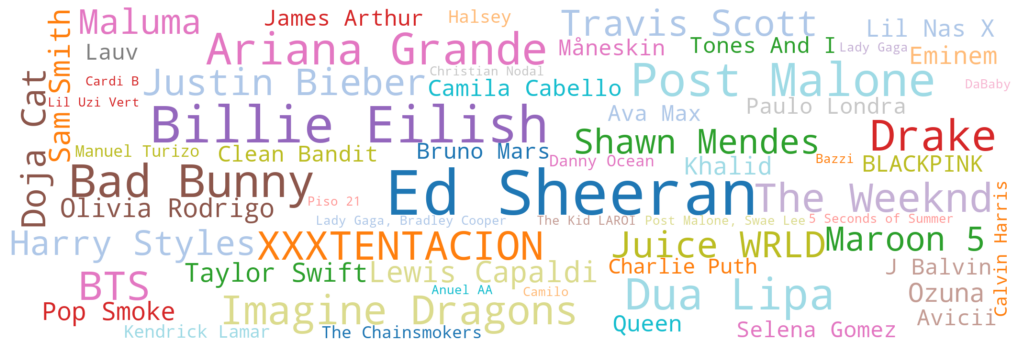

In [ ]:
counts = df['artist'].value_counts()
visualize_word_counts(counts)

In [ ]:
artists_songs = df.groupby(['region']).sum(['streams']).reset_index().loc[:, ['region', 'streams']]

In [ ]:
artists_songs

,region,streams
0,Andorra,0.000000e+00
1,Argentina,1.953381e+10
2,Australia,2.012821e+10
3,Austria,2.703191e+09
4,Belgium,3.883143e+09
...,...,...
65,United Arab Emirates,3.050062e+08
66,United Kingdom,3.640880e+10
67,United States,1.421321e+11
68,Uruguay,1.323026e+09


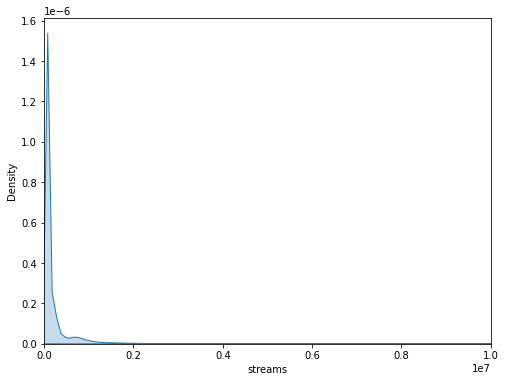

In [ ]:
plt.figure(figsize=(8, 6))
plt.xlim(0, 10000000)
sns.kdeplot(data=df['streams'], shade=True)
plt.show()

In [ ]:
stream = df.groupby(['region']).sum(['streams'])

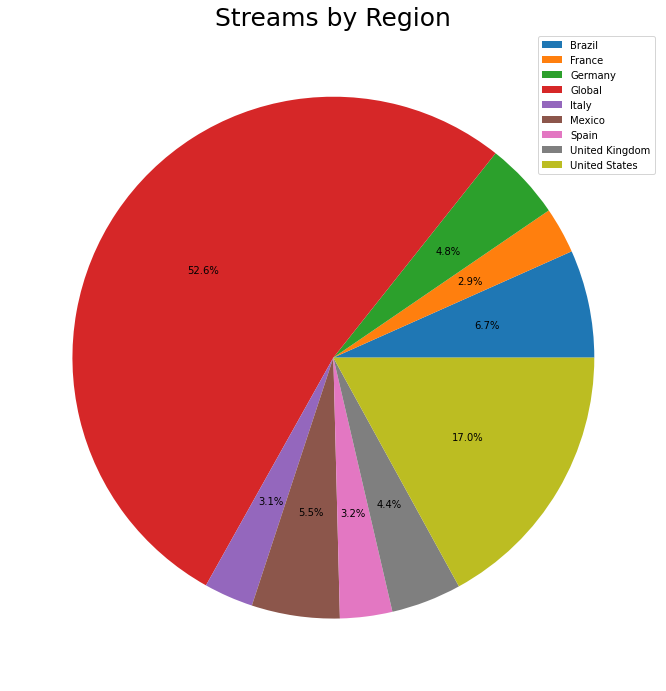

In [ ]:
stream['percent'] = round(stream['streams']/(sum(stream['streams']))*100, 2)
most_streaming_regions = stream[stream.percent >= 2]

plt.figure(figsize=(12, 12))
plt.title("Streams by Region", size=25)
plt.pie(x=most_streaming_regions['percent'], autopct="%.1f%%")
plt.legend(most_streaming_regions.index)
plt.show()

In [ ]:
trends = df.groupby(['trend']).sum(['streams'])

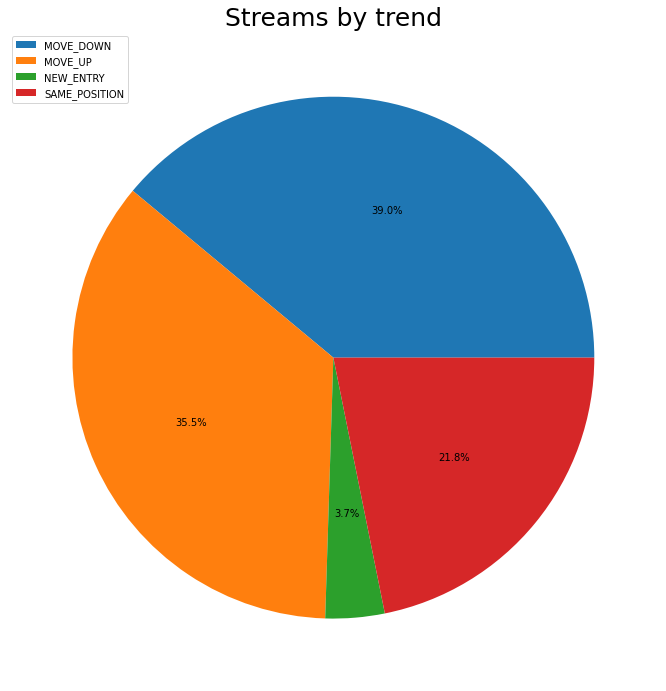

In [ ]:
trends['percent'] = round(trends['streams']/(sum(trends['streams']))*100, 2)
most_streaming_trends = trends[trends.percent >= 0.5]

plt.figure(figsize=(12, 12))
plt.title("Streams by trend", size=25)
plt.pie(x=most_streaming_trends['percent'], autopct="%.1f%%")
plt.legend(most_streaming_trends.index)
plt.show()

In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df["Day"] = df['date'].dt.dayofyear

In [ ]:
streams_by_day_of_year = df.groupby(['Day']).sum(['streams']).reset_index()

In [ ]:
streams_by_day_of_year.head()

,Day,rank,streams
0,1,5528260,2.552400e+09
1,2,5563396,2.589228e+09
2,3,5585705,2.665802e+09
3,4,5610302,2.724598e+09
4,5,5617258,2.696058e+09


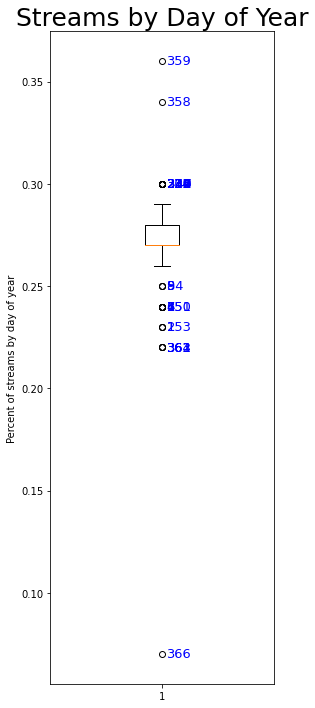

In [ ]:
streams_by_day_of_year['percent'] = round(streams_by_day_of_year['streams']/(sum(streams_by_day_of_year['streams']))*100, 2)

plt.figure(figsize=(4, 12))
plt.title("Streams by Day of Year", size=25)
plt.boxplot(x=streams_by_day_of_year['percent'])

q1,q2,q3 = streams_by_day_of_year.percent.quantile([0.25,0.5,0.75]).values
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)

for row in streams_by_day_of_year.itertuples():
    val = row.percent
    if val > outlier_top_lim or val < outlier_bottom_lim:
        plt.text(1.02, val, row.Day, ha='left', va='center',color='blue',fontsize=13)

plt.ylabel("Percent of streams by day of year")

plt.show()

In [ ]:
df["Month"] = df['date'].dt.month

In [ ]:
df_bar = df.groupby(['Month']).sum(['streams'])

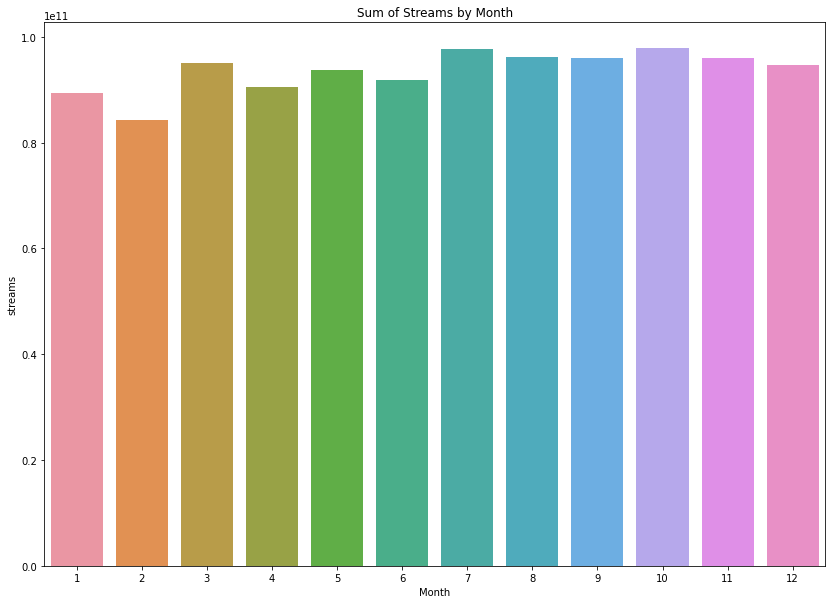

In [ ]:
plt.figure(figsize=(14, 10))
plt.title("Sum of Streams by Month")
sns.barplot(x=df_bar.index, y=df_bar.streams)
plt.show()

In [ ]:
df_bar_by_direction = df.groupby(['Month', 'trend']).sum(['streams']).loc[:, ['streams']].reset_index()

In [ ]:
streams = list(df_bar_by_direction.streams)
index = [i for i in range(1, 13)]
MOVE_DOWN = []
MOVE_UP = []
NEW_ENTRY = []
SAME_POSITION = []
for i in range(len(df_bar_by_direction)):
  if i%4 == 0:
    MOVE_DOWN.append(streams[i])

  elif i%4 == 1:
    MOVE_UP.append(streams[i])

  elif i%4 == 2:
    NEW_ENTRY.append(streams[i])

  else:
    SAME_POSITION.append(streams[i])

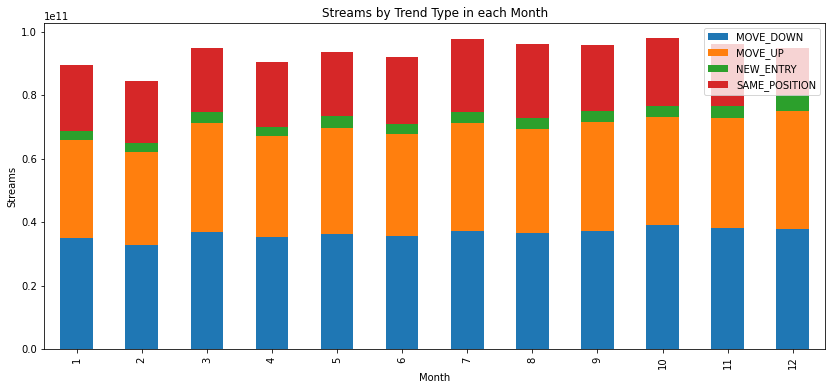

In [ ]:
data_for_stacked_bar = pd.DataFrame(data={'MOVE_DOWN': MOVE_DOWN,'MOVE_UP': MOVE_UP, 'NEW_ENTRY': NEW_ENTRY,'SAME_POSITION': SAME_POSITION}, index=index)

data_for_stacked_bar.plot(kind= 'bar', stacked = True, figsize=(14, 6))
plt.title('Streams by Trend Type in each Month')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.show()

In [ ]:
top_five_ever = list(df.groupby(['title']).sum(['streams']).sort_values(by='streams', ascending=False).reset_index().loc[:5, ['title']].title)

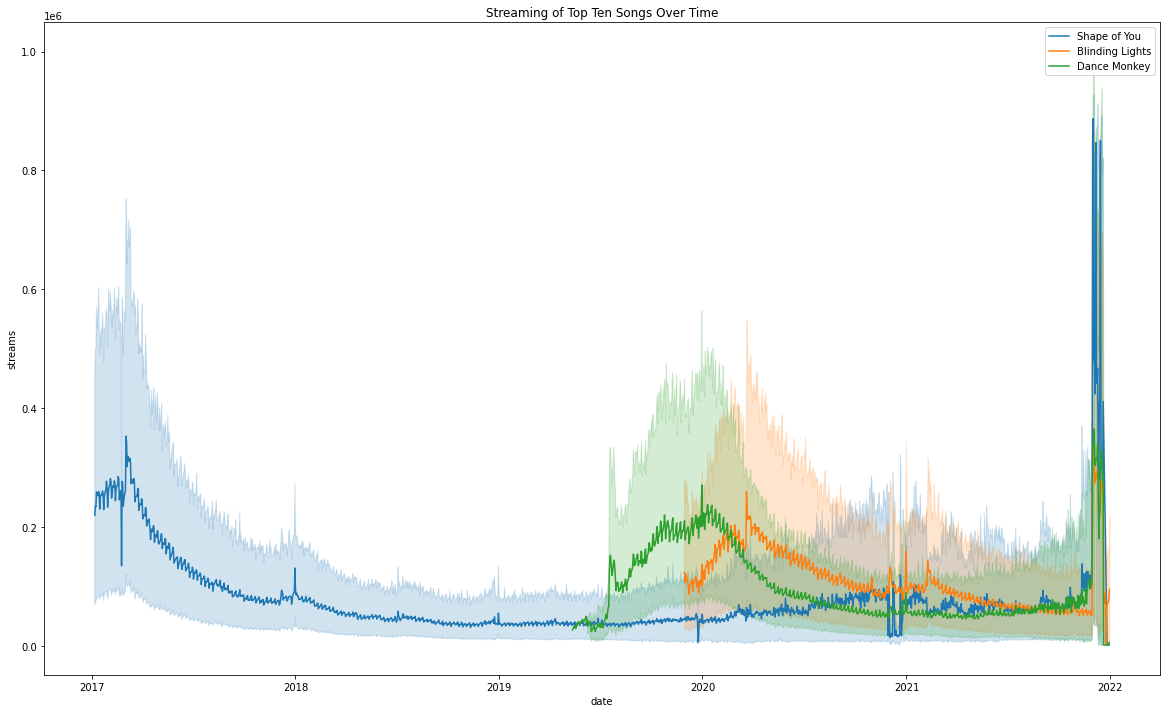

In [ ]:
plt.figure(figsize=(20, 12))

for i in top_five_ever:
  sns.lineplot(x='date', y='streams', data=df[df.title==i])

plt.title("Streaming of Top Five Songs Over Time")
plt.legend(top_five_ever)
plt.show()

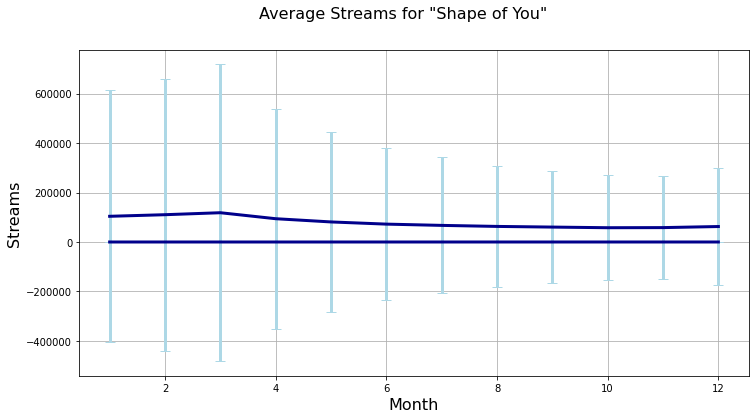

In [ ]:
selected_music = df[df['title']=='Shape of You']

err = selected_music.groupby(['Month']).std()
selected_music.groupby(['Month']).mean().plot.line(color='DarkBlue',figsize=(12,6),legend=[],linewidth=3,grid=True,
                                                      yerr=err,capsize=5,ecolor='LightBlue',
                                                      )    # This part is for error bars


# Now let's setup the labels, titles and format y axis as percentages
plt.suptitle('Average Streams for "Shape of You"',fontsize=16)
plt.ylabel('Streams',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.show()

In [ ]:
data_for_scatter_plot = df.groupby(["Month", "region"]).sum(['streams']).reset_index()
data_for_scatter = data_for_scatter_plot.loc[data_for_scatter_plot['region'].isin(['Vietnam', 'United States', 'Argentina', 'Germany', 'United Arab Emirates'])]

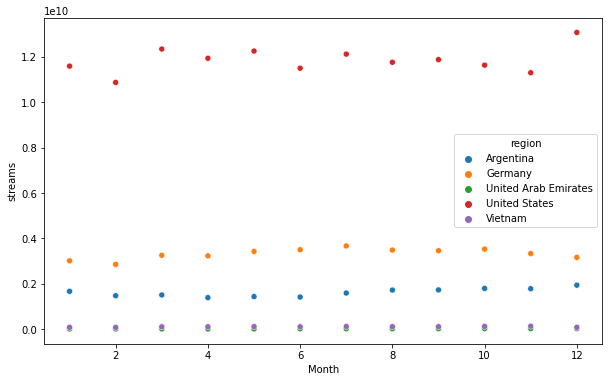

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_for_scatter, x="Month", y="streams", hue="region")
plt.show()